# Global Terrorism Impact

In [1]:
import pandas as pd
# import streamlit as st
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("/Users/asutoshdalei/Desktop/Work/GlobalTerrorism/globalterrorismdb.csv",encoding= 'ISO-8859-1')
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

data=data[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
data['casualities']=data['Killed']+data['Wounded']

data = data[(data.Month!=0) & (data.Day!=0)]

def dateFnx(row):
    date = str(row['Month'])+':'+str(row['Day'])+':'+str(row['Year'])
    return pd.to_datetime(date,format='%m:%d:%Y')

data['date'] = data.apply(dateFnx,axis=1)

In [2]:
print(data.shape)

(180800, 19)


In [26]:
data.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'city', 'latitude',
       'longitude', 'AttackType', 'Killed', 'Wounded', 'Target', 'Summary',
       'Group', 'Target_type', 'Weapon_type', 'Motive', 'casualities', 'date'],
      dtype='object')

In [3]:
data.head(3)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities,date
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0,1970-07-02
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment,0.0,1970-01-01
6,1970,1,2,Uruguay,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...,NaN,Tupamaros (Uruguay),Police,Firearms,NaN,0.0,1970-01-02


In [32]:
data.Country.unique().tolist()

['Dominican Republic',
 'United States',
 'Uruguay',
 'Italy',
 'East Germany (GDR)',
 'Ethiopia',
 'Guatemala',
 'Philippines',
 'Venezuela',
 'West Germany (FRG)',
 'Switzerland',
 'Jordan',
 'Spain',
 'Brazil',
 'Egypt',
 'Argentina',
 'Lebanon',
 'Japan',
 'Ireland',
 'Turkey',
 'Paraguay',
 'Iran',
 'United Kingdom',
 'Colombia',
 'Bolivia',
 'Greece',
 'Nicaragua',
 'Belgium',
 'Mexico',
 'Netherlands',
 'Canada',
 'Australia',
 'Pakistan',
 'Zambia',
 'Sweden',
 'Costa Rica',
 'South Yemen',
 'Israel',
 'Poland',
 'Taiwan',
 'Panama',
 'West Bank and Gaza Strip',
 'Austria',
 'Czechoslovakia',
 'India',
 'France',
 'South Vietnam',
 'Cambodia',
 'Brunei',
 'Zaire',
 "People's Republic of the Congo",
 'Portugal',
 'Algeria',
 'El Salvador',
 'Thailand',
 'Haiti',
 'Sudan',
 'Morocco',
 'Cyprus',
 'Myanmar',
 'Afghanistan',
 'Peru',
 'Chile',
 'Honduras',
 'Yugoslavia',
 'Ecuador',
 'New Zealand',
 'Malaysia',
 'Singapore',
 'Botswana',
 'Kuwait',
 'Jamaica',
 'Chad',
 'North Yeme

In [4]:
data[data[['latitude','longitude']].notna()][['latitude','longitude']]

,latitude,longitude
0,18.456792,-69.951164
5,37.005105,-89.176269
6,-34.891151,-56.187214
7,37.791927,-122.225906
8,43.076592,-89.412488
...,...,...
181686,2.359673,45.385034
181687,35.407278,35.942679
181688,6.900742,124.437908
181689,24.798346,93.940430


In [5]:
data[data.latitude.notna() & data.longitude.notna()][['latitude','longitude']]

,latitude,longitude
0,18.456792,-69.951164
5,37.005105,-89.176269
6,-34.891151,-56.187214
7,37.791927,-122.225906
8,43.076592,-89.412488
...,...,...
181686,2.359673,45.385034
181687,35.407278,35.942679
181688,6.900742,124.437908
181689,24.798346,93.940430


In [6]:
yearCount = data.groupby('Year')['Month'].count()
yearCount.head()

Year
1970    636
1971    461
1972    561
1973    463
1974    572
Name: Month, dtype: int64

In [7]:
weekCases = data[['casualities','date']].set_index('date').resample('W')['casualities'].count()
# data['date']
weekCasualities = data[['casualities','date']].set_index('date').resample('W')['casualities'].count()
# data['date']
weekCases


date
1970-01-04      6
1970-01-11      5
1970-01-18      5
1970-01-25      9
1970-02-01     11
             ... 
2017-12-03    206
2017-12-10    163
2017-12-17    146
2017-12-24    130
2017-12-31    150
Freq: W-SUN, Name: casualities, Length: 2505, dtype: int64

In [8]:
tt = data[['casualities','date']].set_index('date').resample('Y')['casualities'].count()

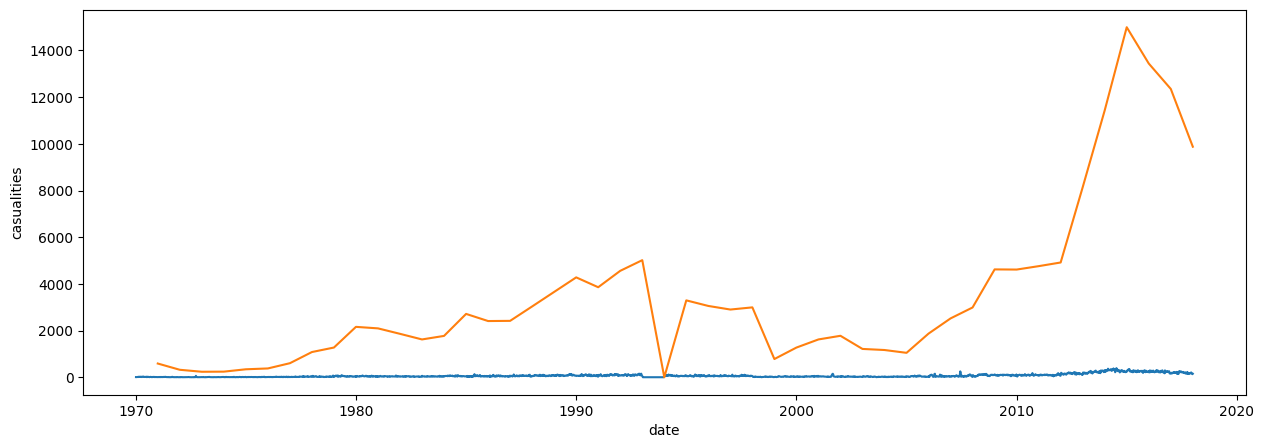

In [9]:
plt.figure(figsize=(15,5),dpi=100)
# sns.lineplot(data=data,x='date',y='casualities')
sns.lineplot(weekCases)
sns.lineplot(tt)
plt.show()

In [79]:
a,b = data[data.Country=='India']['date'].agg(['min','max'])

a,b = data[data.latitude.notna() & data.longitude.notna()]['date'].agg(['min','max'])
a,b
c = pd.date_range(a,b,freq = 'W').strftime('%Y-%m-%d').tolist()

In [81]:
data[data.date<c[0]]
# a

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities,date
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment,0.0,1970-01-01
6,1970,1,2,Uruguay,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...,NaN,Tupamaros (Uruguay),Police,Firearms,NaN,0.0,1970-01-02
7,1970,1,2,United States,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,Edes Substation,1/2/1970: Unknown perpetrators detonated explo...,Unknown,Utilities,Explosives,NaN,0.0,1970-01-02
8,1970,1,2,United States,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...","1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft,0.0,1970-01-02
9,1970,1,3,United States,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft,0.0,1970-01-03
10,1970,1,1,United States,North America,Baraboo,43.468500,-89.744299,Bombing/Explosion,0.0,0.0,Badger Army ammo depot.,NaN,"Weather Underground, Weathermen",Military,Explosives,NaN,0.0,1970-01-01


In [76]:
data.date

0        1970-07-02
5        1970-01-01
6        1970-01-02
7        1970-01-02
8        1970-01-02
            ...    
181686   2017-12-31
181687   2017-12-31
181688   2017-12-31
181689   2017-12-31
181690   2017-12-31
Name: date, Length: 180800, dtype: datetime64[ns]

In [10]:
tt = data.groupby('Country')['casualities'].sum()

In [40]:
tt = plt.cm.get_cmap('cool',4)
tt(1)

(np.float64(0.3333333333333333),
 np.float64(0.6666666666666667),
 np.float64(1.0),
 np.float64(1.0))

In [82]:
data['Country'].value_counts(sort=True)

Country
Iraq                 24616
Pakistan             14331
Afghanistan          12718
India                11931
Colombia              8232
                     ...  
Andorra                  1
South Vietnam            1
Wallis and Futuna        1
Falkland Islands         1
North Korea              1
Name: count, Length: 205, dtype: int64